In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
modified_data = pd.read_csv('term-deposit-marketing-background-variables.csv')
modified_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y,age_group,y_encoded,balance_group,job_group
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no,42-60,0,2000-4000,management_entrepreneur
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no,42-60,0,0-750,office_support
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no,33-42,0,0-750,management_entrepreneur
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no,42-60,0,750-2000,manual_labor
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no,33-42,0,0-750,not_working


In [38]:
modified_data['duration'] = (modified_data['duration'] / 60).round(2)
modified_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y,age_group,y_encoded,balance_group,job_group
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,4.35,1,no,42-60,0,2000-4000,management_entrepreneur
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,2.52,1,no,42-60,0,0-750,office_support
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,1.27,1,no,33-42,0,0-750,management_entrepreneur
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,1.53,1,no,42-60,0,750-2000,manual_labor
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,3.30,1,no,33-42,0,0-750,not_working


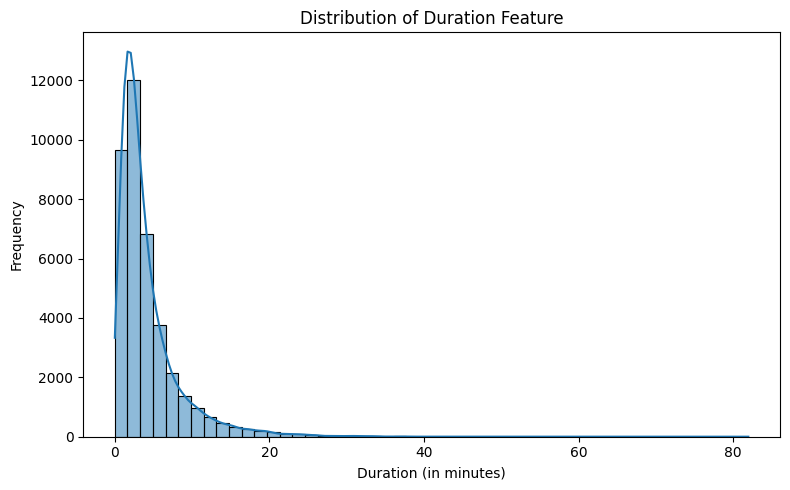

In [39]:
plt.figure(figsize=(8, 5))
sns.histplot(modified_data['duration'], bins=50, kde=True)
plt.title('Distribution of Duration Feature')
plt.xlabel('Duration (in minutes)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

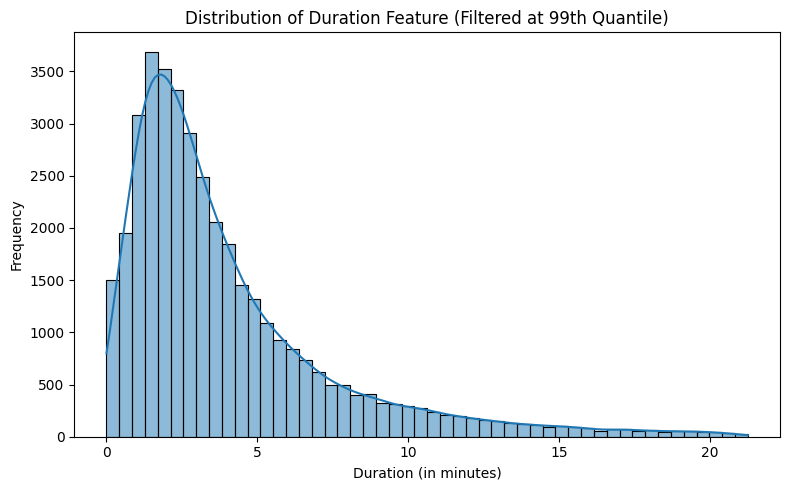

In [40]:
# Filter the 'duration' feature in modified_data using the 99th quantile
duration_99 = modified_data['duration'].quantile(0.99)
filtered_duration = modified_data[modified_data['duration'] <= duration_99]['duration']

# Plot the histogram
plt.figure(figsize=(8, 5))
sns.histplot(filtered_duration, bins=50, kde=True)
plt.title('Distribution of Duration Feature (Filtered at 99th Quantile)')
plt.xlabel('Duration (in minutes)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

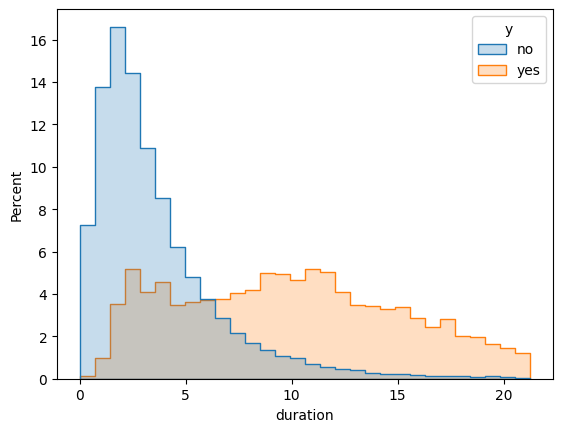

In [41]:

# Prepare filtered data with y label
filtered_df = modified_data[modified_data['duration'] <= duration_99]

# Plot without custom labels to see the default
sns.histplot(data=filtered_df, x='duration', hue='y', bins=30, element='step', 
             stat='percent', common_norm=False)
plt.show()  # Check what the default legend shows

C:\Users\samar\AppData\Local\Temp\ipykernel_19860\1791424084.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=filtered_df, x='y', y='duration', palette='Set2', ax=axes[2])


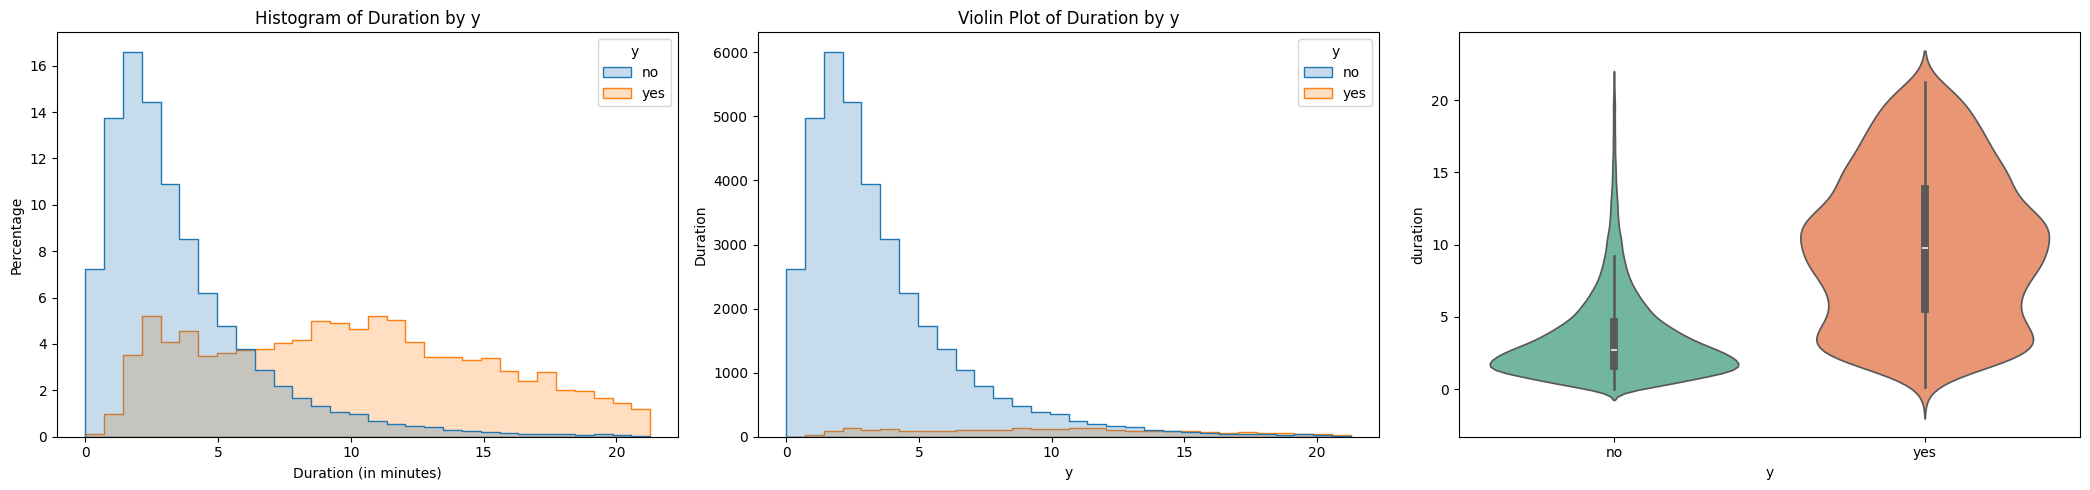

In [42]:
fig, axes = plt.subplots(1, 3, figsize=(21, 5))

# Histogram by y
sns.histplot(data=filtered_df, x='duration', hue='y', bins=30, element='step', stat='percent', common_norm=False, ax=axes[0])
axes[0].set_title('Histogram of Duration by y')
axes[0].set_xlabel('Duration (in minutes)')
axes[0].set_ylabel('Percentage')

# Histogram by y
sns.histplot(data=filtered_df, x='duration', hue='y', bins=30, element='step', stat='count', common_norm=False, ax=axes[1])
axes[1].set_title('Histogram of Duration by y')
axes[1].set_xlabel('Duration (in minutes)')
axes[1].set_ylabel('Count of calls')


# Violin plot by y
sns.violinplot(data=filtered_df, x='y', y='duration', palette='Set2', ax=axes[2])
axes[1].set_title('Violin Plot of Duration by y')
axes[1].set_xlabel('y')
axes[1].set_ylabel('Duration')

plt.tight_layout()
plt.show()

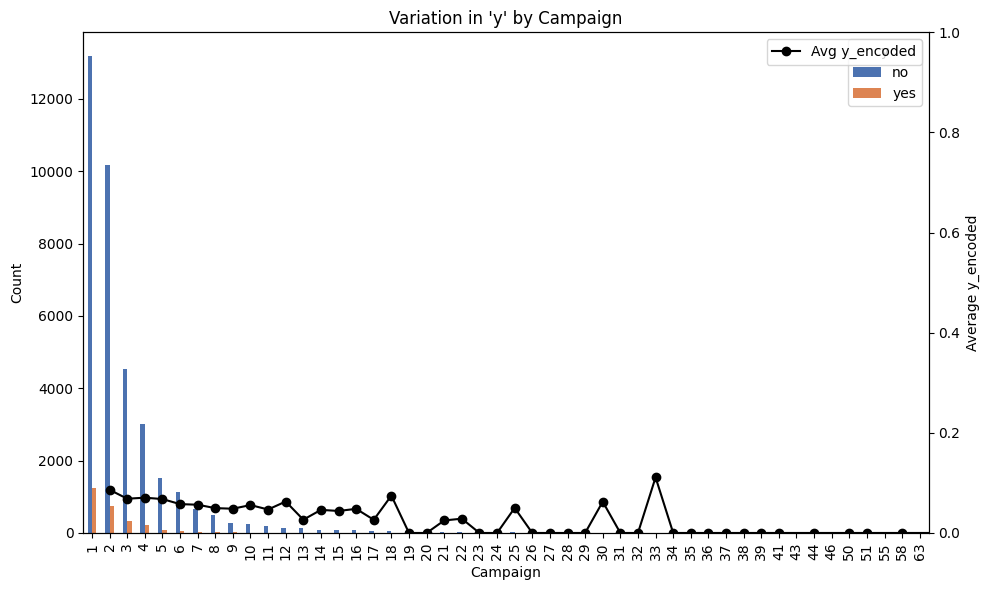

In [43]:
# Bar plots for 'campaign' distribution by 'y' and line plot for average y_encoded

# Calculate counts of 'y' for each 'campaign' value
campaign_counts = modified_data.groupby(['campaign', 'y']).size().unstack(fill_value=0)

# Calculate average y_encoded for each campaign value
campaign_avg = modified_data.groupby('campaign')['y_encoded'].mean()

fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for y counts by campaign
campaign_counts.plot(kind='bar', stacked=False, ax=ax1, color=['#4C72B0', '#DD8452'])
ax1.set_ylabel('Count')
ax1.set_xlabel('Campaign')
ax1.set_title("Variation in 'y' by Campaign")

# Line plot for average y_encoded
ax2 = ax1.twinx()
ax2.plot(campaign_avg.index, campaign_avg.values, color='black', marker='o', linestyle='-', label='Avg y_encoded')
ax2.set_ylabel('Average y_encoded')
ax2.set_ylim(0, 1)
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

In [44]:
# Create a new campaign category feature in modified_data
def campaign_category(campaign):
    if campaign == 1:
        return 'campaign_1'
    elif campaign == 2:
        return 'campaign_2'
    elif campaign == 3:
        return 'campaign_3'
    elif 4 <= campaign <= 10:
        return 'campaign_mt3_lt11'
    else:
        return 'campaign_gt10'

modified_data['campaign_category_v2'] = modified_data['campaign'].apply(campaign_category)
modified_data['campaign_category_v2'].value_counts()

campaign_category_v2
campaign_1           14426
campaign_2           10934
campaign_mt3_lt11     7812
campaign_3            4867
campaign_gt10         1161
Name: count, dtype: int64

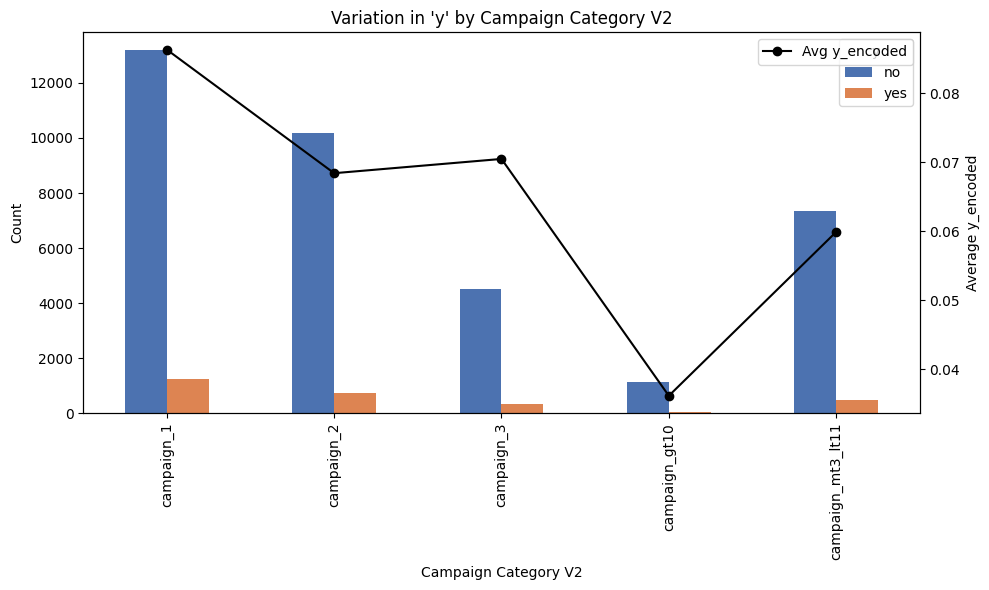

In [45]:
# Calculate counts of 'y' for each 'campaign_category_v2' value
campaign_cat_v2_counts = modified_data.groupby(['campaign_category_v2', 'y']).size().unstack(fill_value=0)

# Calculate average y_encoded for each campaign_category_v2 value
campaign_cat_v2_avg = modified_data.groupby('campaign_category_v2')['y_encoded'].mean()

fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for y counts by campaign_category_v2
campaign_cat_v2_counts.plot(kind='bar', stacked=False, ax=ax1, color=['#4C72B0', '#DD8452'])
ax1.set_ylabel('Count')
ax1.set_xlabel('Campaign Category V2')
ax1.set_title("Variation in 'y' by Campaign Category V2")

# Line plot for average y_encoded
ax2 = ax1.twinx()
ax2.plot(campaign_cat_v2_avg.index, campaign_cat_v2_avg.values, color='black', marker='o', linestyle='-', label='Avg y_encoded')
ax2.set_ylabel('Average y_encoded')
# ax2.set_ylim(0, 1)
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

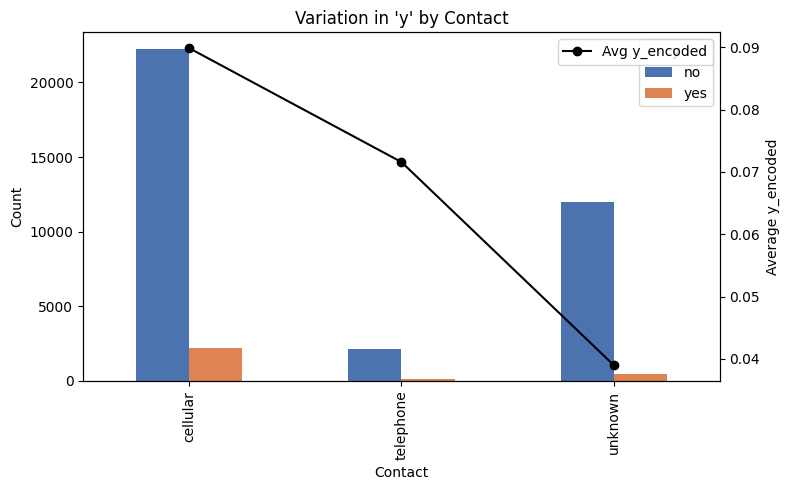

In [46]:
# Bar plots for 'contact' distribution by 'y' and line plot for average y_encoded

# Calculate counts of 'y' for each 'contact' value
contact_counts = modified_data.groupby(['contact', 'y']).size().unstack(fill_value=0)

# Calculate average y_encoded for each contact value
contact_avg = modified_data.groupby('contact')['y_encoded'].mean()

fig, ax1 = plt.subplots(figsize=(8, 5))

# Bar plot for y counts by contact
contact_counts.plot(kind='bar', stacked=False, ax=ax1, color=['#4C72B0', '#DD8452'])
ax1.set_ylabel('Count')
ax1.set_xlabel('Contact')
ax1.set_title("Variation in 'y' by Contact")

# Line plot for average y_encoded
ax2 = ax1.twinx()
ax2.plot(contact_avg.index, contact_avg.values, color='black', marker='o', linestyle='-', label='Avg y_encoded')
ax2.set_ylabel('Average y_encoded')
# ax2.set_ylim(0, 1)
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

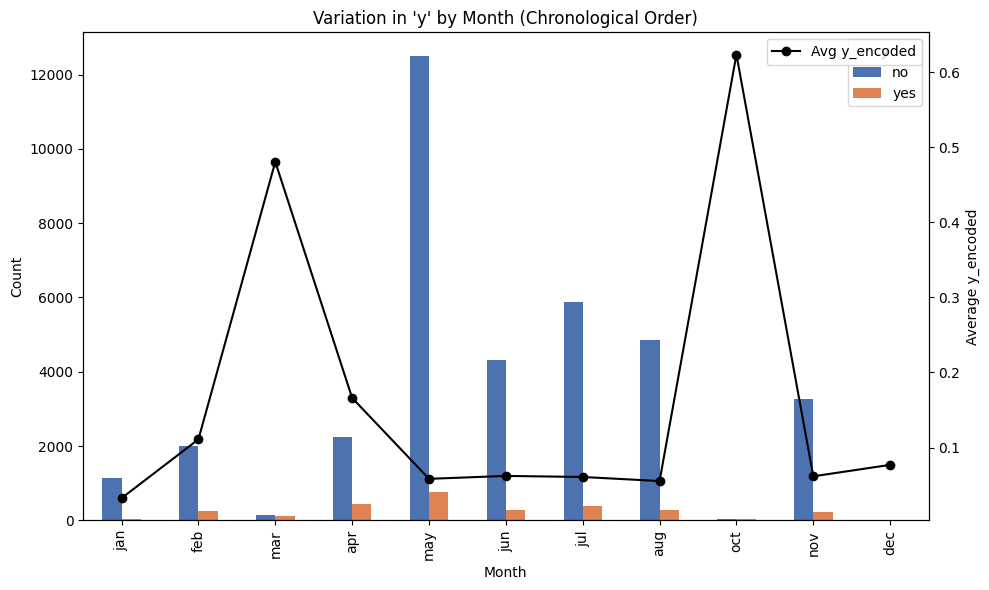

In [47]:
# Calculate counts of 'y' for each 'month' value
month_counts = modified_data.groupby(['month', 'y']).size().unstack(fill_value=0)

# Calculate average y_encoded for each month value
month_avg = modified_data.groupby('month')['y_encoded'].mean()

# Define the correct chronological order for months
month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

# Filter months present in the data and preserve order
months_in_data = [m for m in month_order if m in month_counts.index]

# Reindex month_counts and month_avg to the correct order
month_counts_sorted = month_counts.reindex(months_in_data)
month_avg_sorted = month_avg.reindex(months_in_data)

fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for y counts by month (in order)
month_counts_sorted.plot(kind='bar', stacked=False, ax=ax1, color=['#4C72B0', '#DD8452'])
ax1.set_ylabel('Count')
ax1.set_xlabel('Month')
ax1.set_title("Variation in 'y' by Month (Chronological Order)")

# Line plot for average y_encoded (in order)
ax2 = ax1.twinx()
ax2.plot(month_avg_sorted.index, month_avg_sorted.values, color='black', marker='o', linestyle='-', label='Avg y_encoded')
ax2.set_ylabel('Average y_encoded')
# ax2.set_ylim(0, 1)
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

#### Months - March and October had the highest subscription rate - but very low sample space to be included in meaningful trends.

In [48]:
# Define mapping from month to period category
month_to_period = {
    'jan': 'start_year', 'feb': 'start_year', 'mar': 'start_year', 'apr': 'start_year',
    'may': 'mid_year', 'jun': 'mid_year', 'jul': 'mid_year', 'aug': 'mid_year',
    'sep': 'end_year', 'oct': 'end_year', 'nov': 'end_year', 'dec': 'end_year'
}

# Create the new feature
modified_data['month_period'] = modified_data['month'].map(month_to_period)
modified_data['month_period'].value_counts()

month_period
mid_year      29277
start_year     6364
end_year       3559
Name: count, dtype: int64

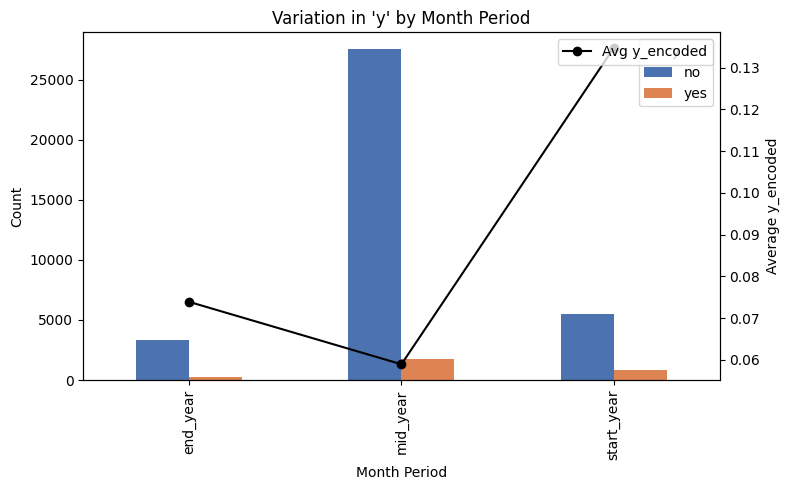

In [49]:
# Calculate counts of 'y' for each 'month_period' value
month_period_counts = modified_data.groupby(['month_period', 'y']).size().unstack(fill_value=0)

# Calculate average y_encoded for each month_period value
month_period_avg = modified_data.groupby('month_period')['y_encoded'].mean()

fig, ax1 = plt.subplots(figsize=(8, 5))

# Bar plot for y counts by month_period
month_period_counts.plot(kind='bar', stacked=False, ax=ax1, color=['#4C72B0', '#DD8452'])
ax1.set_ylabel('Count')
ax1.set_xlabel('Month Period')
ax1.set_title("Variation in 'y' by Month Period")

# Line plot for average y_encoded
ax2 = ax1.twinx()
ax2.plot(month_period_avg.index, month_period_avg.values, color='black', marker='o', linestyle='-', label='Avg y_encoded')
ax2.set_ylabel('Average y_encoded')
# ax2.set_ylim(0, 1)
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

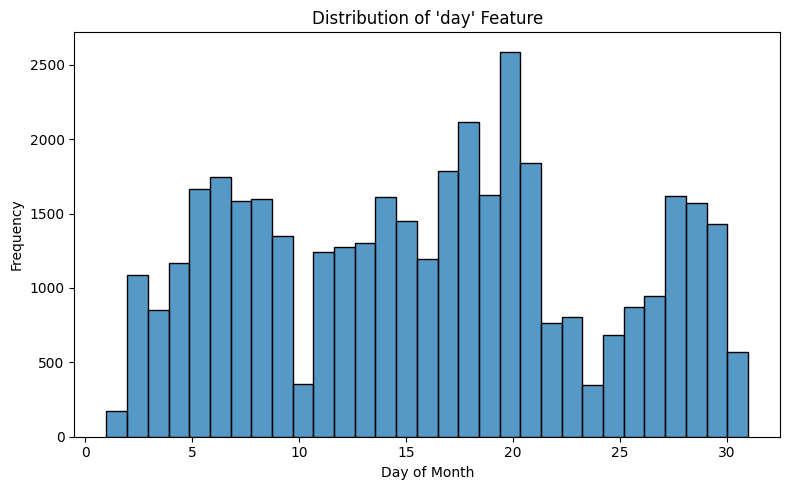

In [50]:
plt.figure(figsize=(8, 5))
sns.histplot(modified_data['day'], bins=31, kde=False)
plt.title("Distribution of 'day' Feature")
plt.xlabel('Day of Month')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

C:\Users\samar\AppData\Local\Temp\ipykernel_19860\1549324550.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=modified_data, x='y', y='day', palette='Set2', ax=axes[1])


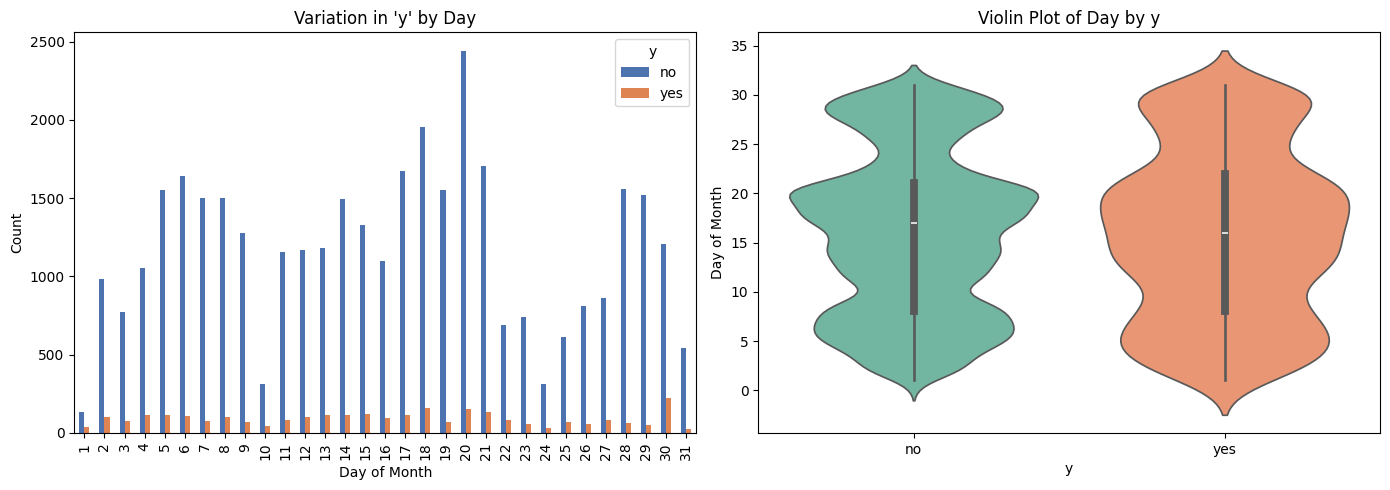

In [51]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar plot: Variation of y for the 'day' feature
day_counts = modified_data.groupby(['day', 'y']).size().unstack(fill_value=0)
day_counts.plot(kind='bar', stacked=False, ax=axes[0], color=['#4C72B0', '#DD8452'])
axes[0].set_title("Variation in 'y' by Day")
axes[0].set_xlabel('Day of Month')
axes[0].set_ylabel('Count')
axes[0].legend(title='y')

# Violin plot: Distribution of 'day' by y
sns.violinplot(data=modified_data, x='y', y='day', palette='Set2', ax=axes[1])
axes[1].set_title("Violin Plot of Day by y")
axes[1].set_xlabel('y')
axes[1].set_ylabel('Day of Month')

plt.tight_layout()
plt.show()

In [52]:
def day_category(day):
    if day < 10:
        return 'before_10th'
    elif 10 <= day <= 20:
        return '10th_to_20th'
    else:
        return 'after_20th'

modified_data['day_category'] = modified_data['day'].apply(day_category)
modified_data['day_category'].value_counts()

day_category
10th_to_20th    16534
after_20th      11443
before_10th     11223
Name: count, dtype: int64

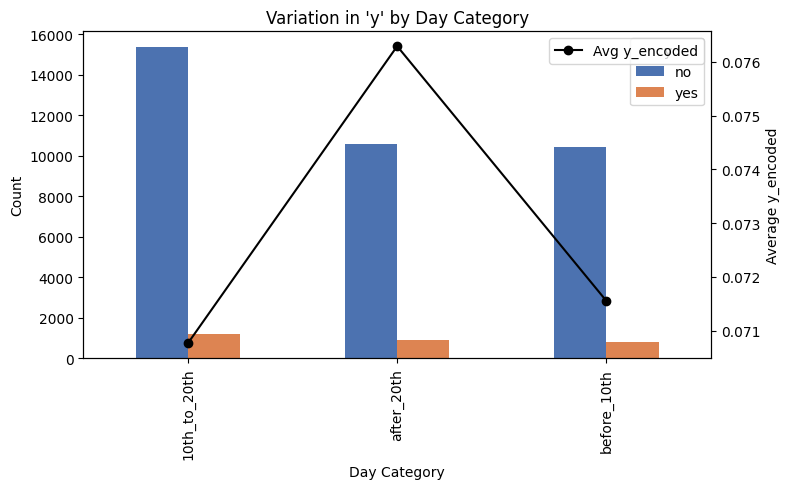

In [53]:
# Bar plots for 'day_category' distribution by 'y' and line plot for average y_encoded

# Calculate counts of 'y' for each 'day_category' value
day_cat_counts = modified_data.groupby(['day_category', 'y']).size().unstack(fill_value=0)

# Calculate average y_encoded for each day_category value
day_cat_avg = modified_data.groupby('day_category')['y_encoded'].mean()

fig, ax1 = plt.subplots(figsize=(8, 5))

# Bar plot for y counts by day_category
day_cat_counts.plot(kind='bar', stacked=False, ax=ax1, color=['#4C72B0', '#DD8452'])
ax1.set_ylabel('Count')
ax1.set_xlabel('Day Category')
ax1.set_title("Variation in 'y' by Day Category")

# Line plot for average y_encoded
ax2 = ax1.twinx()
ax2.plot(day_cat_avg.index, day_cat_avg.values, color='black', marker='o', linestyle='-', label='Avg y_encoded')
ax2.set_ylabel('Average y_encoded')
# ax2.set_ylim(0, 1)
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

In [54]:
modified_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,duration,campaign,y,age_group,y_encoded,balance_group,job_group,campaign_category_v2,month_period,day_category
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,4.35,1,no,42-60,0,2000-4000,management_entrepreneur,campaign_1,mid_year,before_10th
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,2.52,1,no,42-60,0,0-750,office_support,campaign_1,mid_year,before_10th
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,1.27,1,no,33-42,0,0-750,management_entrepreneur,campaign_1,mid_year,before_10th
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,1.53,1,no,42-60,0,750-2000,manual_labor,campaign_1,mid_year,before_10th
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,3.30,1,no,33-42,0,0-750,not_working,campaign_1,mid_year,before_10th


In [55]:
# Convert '<', '>', '-' in group variables to more readable group names

# For 'age_group_new'
modified_data['age_group'] = modified_data['age_group'].replace({
    '<33': 'under_33',
    '33-42': 'age_33_to_42',
    '42-60': 'age_42_to_60',
    '>60': 'over_60'
})

# For 'balance_group'
modified_data['balance_group'] = modified_data['balance_group'].replace({
    '<0': 'balance_under_0',
    '0-750': 'balance_0_to_750',
    '750-2000': 'balance_750_to_2000',
    '2000-4000': 'balance_2000_to_4000',
    '>4000': 'balance_over_4000'
})

# For 'day_category'
modified_data['day_category'] = modified_data['day_category'].replace({
    'before_10th': 'day_1_to_9',
    '10th_to_20th': 'day_10_to_20',
    'after_20th': 'day_21_to_31'
})

# Drop specified columns
modified_data = modified_data.drop(columns=['age', 'balance', 'day'])
modified_data.head()

,job,marital,education,default,housing,loan,contact,month,duration,campaign,y,age_group,y_encoded,balance_group,job_group,campaign_category_v2,month_period,day_category
0,management,married,tertiary,no,yes,no,unknown,may,4.35,1,no,age_42_to_60,0,balance_2000_to_4000,management_entrepreneur,campaign_1,mid_year,day_1_to_9
1,technician,single,secondary,no,yes,no,unknown,may,2.52,1,no,age_42_to_60,0,balance_0_to_750,office_support,campaign_1,mid_year,day_1_to_9
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,1.27,1,no,age_33_to_42,0,balance_0_to_750,management_entrepreneur,campaign_1,mid_year,day_1_to_9
3,blue-collar,married,unknown,no,yes,no,unknown,may,1.53,1,no,age_42_to_60,0,balance_750_to_2000,manual_labor,campaign_1,mid_year,day_1_to_9
4,unknown,single,unknown,no,no,no,unknown,may,3.30,1,no,age_33_to_42,0,balance_0_to_750,not_working,campaign_1,mid_year,day_1_to_9


In [56]:
modified_data = modified_data.drop(columns=['job', 'month', 'campaign'])
modified_data.head()

,marital,education,default,housing,loan,contact,duration,y,age_group,y_encoded,balance_group,job_group,campaign_category_v2,month_period,day_category
0,married,tertiary,no,yes,no,unknown,4.35,no,age_42_to_60,0,balance_2000_to_4000,management_entrepreneur,campaign_1,mid_year,day_1_to_9
1,single,secondary,no,yes,no,unknown,2.52,no,age_42_to_60,0,balance_0_to_750,office_support,campaign_1,mid_year,day_1_to_9
2,married,secondary,no,yes,yes,unknown,1.27,no,age_33_to_42,0,balance_0_to_750,management_entrepreneur,campaign_1,mid_year,day_1_to_9
3,married,unknown,no,yes,no,unknown,1.53,no,age_42_to_60,0,balance_750_to_2000,manual_labor,campaign_1,mid_year,day_1_to_9
4,single,unknown,no,no,no,unknown,3.30,no,age_33_to_42,0,balance_0_to_750,not_working,campaign_1,mid_year,day_1_to_9


In [57]:
modified_data.to_csv('term-deposit-marketing-after-outreach-variables.csv', index=False)